# Learning Unit 2 - Visualization - Example

In [1]:
cd ..

/Users/pedro/PycharmProjects/workshop_viz/lisbon.ai-workshop/units


In [2]:
# importing libraries 
import pydotplus
from IPython.display import Image
from sklearn import tree 
import seaborn as sns 
from matplotlib import pyplot as plt 
from bokeh.io import output_notebook

from utils import load_data, visualizations

# the following are for the charts to display inline 
output_notebook()  
% matplotlib inline 

Loading BokehJS ...

# Inbuilt Pandas plotting 

In [3]:
df1 = load_data.get_correlated_data()

#### Line charts

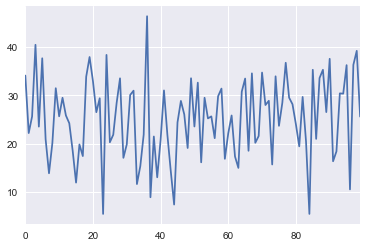

In [4]:
df1['a'].plot()
plt.show()

#### Bar charts

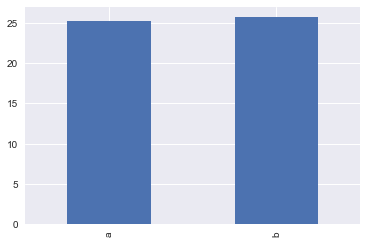

In [5]:
df1.mean().plot(kind='bar')
plt.show()

#### Scatterplots 

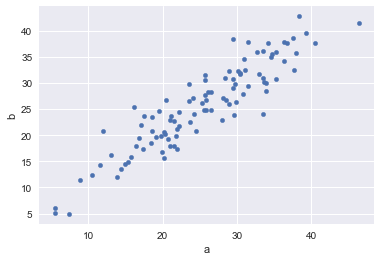

In [6]:
df1.plot(kind='scatter', x='a', y='b')
plt.show()

# Seaborn 

Heatmap 

In [7]:
temperatures = load_data.get_temperature_data()

In [8]:
temperatures.head()

,Min,Mean,Max
Autumn,7,14,25
Spring,6,20,29
Summer,15,25,39
Winter,-2,5,16


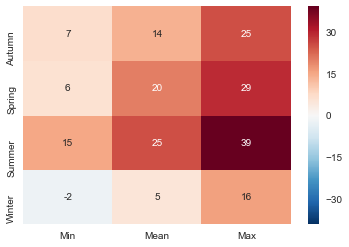

In [9]:
sns.heatmap(temperatures, annot=True)
plt.show()

# Bokeh

Bokeh is extremely [powerful, yet hard to control](https://i.imgur.com/mmPjwCF.gif). 

In [10]:
cross = load_data.get_cross_data()

In [11]:
cross.head()

,a,b,c
0,1.0,1.0,1
1,1.0,112.0,1
2,1.0,223.0,1
3,1.0,334.0,1
4,1.0,445.0,1


In [12]:
visualizations.plot_scatter_3_features(cross, 'a', 'b', 'c', 'My first bokeh plot')

In [13]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [14]:
dt.fit(cross[['b', 'a']], cross['c'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [15]:
dot_data = tree.export_graphviz(dt,
                                out_file=None,
                                impurity=True,
                                feature_names=['b', 'a'],
                                class_names=['red', 'green'],
                                filled=True, rounded=True,
                                special_characters=True)

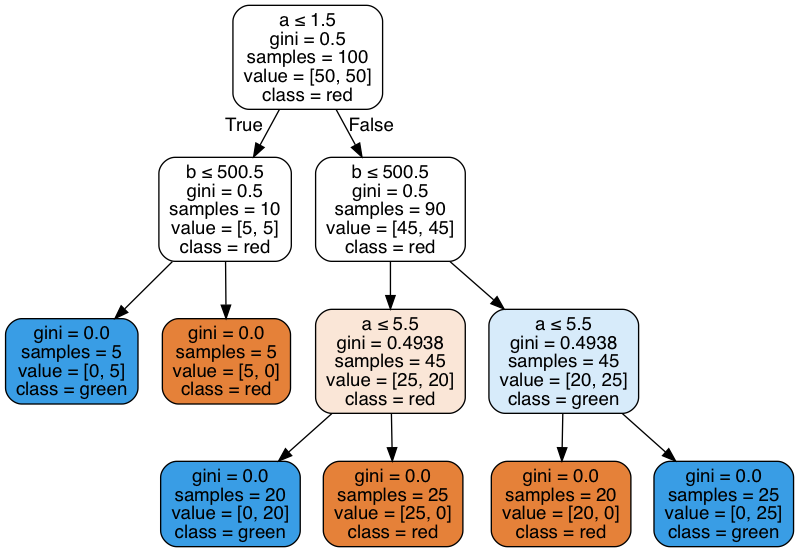

In [16]:
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

Very interesting. Now consider that first split. Pretty weird huh? Any idea why it split at such a stupid place? 

## TODO: give them the answer, but force them to say they are too lazy to answer 

_Note: You might have noticed we fit the tree with `dt.fit(cross['b', 'a'], cross['c'])` instead of `dt.fit(cross['a', 'b'], cross['c'])`  
This was for a [very technical reason](https://i.imgflip.com/1ydlm5.jpg)_